In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, power_transform, quantile_transform
import scipy.stats as st
from sklearn.neural_network import MLPRegressor

In [126]:
df = pd.read_csv('rnn_data_prajwal.csv', 
                 parse_dates=['DateTime'], index_col='DateTime')

In [127]:
Xvar = ['Ta', 'Ws', 'Fg', 'VPD', 'Fn', 'q', 'Ts', 'Sws']
yvar = 'Fc'

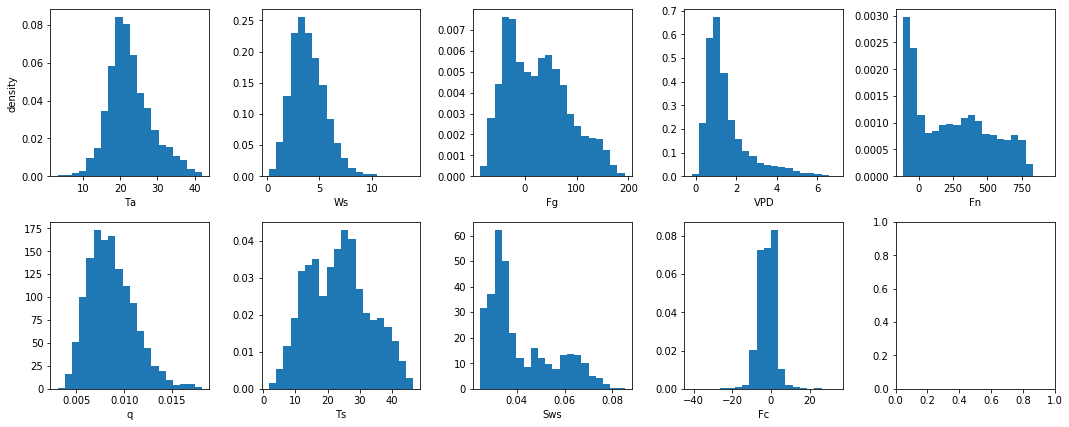

In [128]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15,6))
ax = ax.flatten()
for j, item in enumerate(Xvar+[yvar]):
    ax[j].hist(df[item], bins=20, density=True)
    ax[j].set_xlabel(item)
ax[0].set_ylabel('density')
plt.tight_layout()

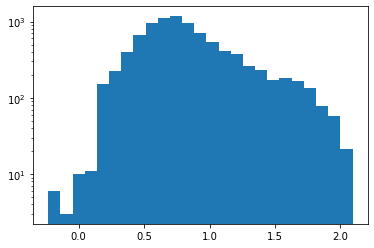

In [129]:
def sigmoid(x):
    e = np.exp(1)
    y = 1/(1+e**(-x))
    return y

def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

def power_transform(X, method='yeo-johnson'):
    y = power_transform(X, method=method)
    return y

def quantile_transform(X, n_quantiles=10):
    y = quantile_transform(X.reshape(-1,1), n_quantiles=n_quantiles)
    
def scipy_yeo(X):
    y = st.yeojohnson(X, 0.01)
    return y

plt.hist(scipy_yeo(df.VPD.values), bins=25, log=True);

df['VPD'] = scipy_yeo(df.VPD.values)

In [130]:
# split into input (X) and output (Y) variables
n_train= 8500

train_df = df.iloc[:n_train]
test_df = df.iloc[n_train:] 

print(train_df.shape, test_df.shape)

X_train, y_train = train_df[Xvar], train_df[yvar]
X_test, y_test = test_df[Xvar], test_df[yvar]

print(X_train.shape, y_train.shape)
print(X_train.keys())

(8500, 10) (515, 10)
(8500, 8) (8500,)
Index(['Ta', 'Ws', 'Fg', 'VPD', 'Fn', 'q', 'Ts', 'Sws'], dtype='object')


In [131]:
scaler1 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train)
scaler2 = StandardScaler()
y_train_scaled = scaler2.fit_transform(y_train.values.reshape(-1,1))
scaler3 = StandardScaler()
X_test_scaled = scaler3.fit_transform(X_test)
scaler4 = StandardScaler()
y_test_scaled = scaler4.fit_transform(y_test.values.reshape(-1,1))

In [132]:
scalers = ['standard', 'minmax']

for ascaler in scalers:
    print(ascaler)
    
    if ascaler =='standard':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        scaler = StandardScaler()
        X_test_scaled = scaler.fit_transform(X_test)
        scaler = StandardScaler()
        y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
        
    elif ascaler == 'minmax':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        scaler = MinMaxScaler()
        X_test_scaled = scaler.fit_transform(X_test)
        scaler = MinMaxScaler()
        y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))
        
    
    reg = LinearRegression().fit(X_train_scaled, y_train_scaled)
    
    ann_reg = MLPRegressor() 
    ann_reg.fit(X_train_scaled, y_train_scaled.squeeze())
    
    y_pred_linreg_scaled = reg.predict(X_test_scaled)
    y_pred_linreg = scaler.inverse_transform(y_pred_linreg_scaled)
    rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_linreg))
    
    y_pred_ann_scaled = ann_reg.predict(X_test_scaled)
    y_pred_ann = scaler.inverse_transform(y_pred_ann_scaled.reshape(-1,1))
    rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
    
    print("RMSE linear[ANN] reg: [{0:1.2f}, {1:1.2f}] ".format(rmse_lin, rmse_ann), 
          )

standard
RMSE linear[ANN] reg: [2.20, 2.34] 
minmax
RMSE linear[ANN] reg: [3.59, 3.05] 
